## Simple Implementation of MinMax algorithm for Chess

### TO-DO
    - Add square value to piece evaluation (use board.piece_map() and values stored in a dict)

In [1]:
import operator
import random
from abc import ABC, abstractmethod
from typing import Dict, Tuple

In [2]:
import numpy as np
from chess import Board

In [4]:
def create_board(situation='initial'):
    board = Board()
    if situation == 'one_move':
        board = Board(fen="r1bqkbnr/1pp1pQpp/p1np4/8/2B1P3/8/PPPP1PPP/RNB1K1NR b KQkq - 0 4")
    elif situation == 'mate_in_one':
        board = Board(fen="r1bqkbnr/p1pp1ppp/1pn5/4p3/2B1P3/5Q2/PPPP1PPP/RNB1K1NR w KQkq - 0 4")
    elif situation == 'mate_in_two_or_promote':
        board = Board(fen="8/3P2K1/p7/8/7R/6R1/1k6/8 w - - 0 1")
    elif situation == 'capture_rook_loses':
        board = Board(fen="2r5/3r2k1/8/8/8/8/5PPP/2R3K1 w - - 0 1")
    return board

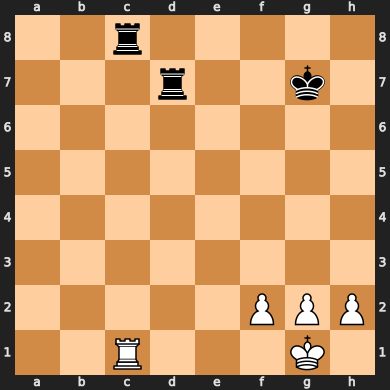

In [5]:
board = create_board("capture_rook_loses")
board

In [6]:
board = Board()

In [7]:
board = Board()
board.push_uci("e2e4")
board.push_uci("e7e5")
board.push_uci("f2f4")
board.push_uci("e5f4")

Move.from_uci('e5f4')

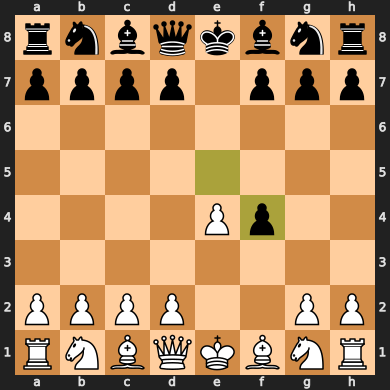

In [8]:
board

#### Definition of a evaluation function

In [9]:
VALUE_DICT = {
    "p": 100,
    "n": 350,
    "b": 350,
    "r": 525,
    "q": 1000,
    "k": 100000
}

In [10]:
def fen_evaluation(fen: str) -> float:
    """
    Function for evaluating a chess position, given its fen notation.
    157 µs ± 1.87 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)"""
    score = float()
    for piece, value in VALUE_DICT.items():
        score += value * (fen.count(piece) - fen.count(piece.upper()))
    mobility = get_mobility(fen)
    return score

In [11]:
def board_evaluation(board: Board, add_mobility: bool=False) -> float:
    """
    Function for evaluating a chess position, given its board.
    It returns positive values for white evaluation.
    157 µs ± 1.87 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)"""
    score = float()
    fen = board.board_fen()
    for piece, value in VALUE_DICT.items():
        score += value * (fen.count(piece.upper()) - fen.count(piece))
    if add_mobility:
        mobility = get_mobility(board)
        if not board.turn:
            mobility *= -1
        score += mobility
    return score

In [12]:
def get_mobility(board: Board, mobility_coeff: float=1) -> float:
    player_legal_moves = len(list(board.legal_moves))
    _board = board.copy()
    _board.turn = not board.turn
    oponent_legal_moves = len(list(_board.legal_moves))
    return mobility_coeff * (player_legal_moves - oponent_legal_moves)

In [ ]:
def minimax(board: Board, depth: int=2) -> dict[str: float]:
    legal_moves = board.legal_moves
    moves_evaluations = dict()
    if depth==0 or board.is_checkmate():
        #print('.', end='')
        player = 2*int(board.turn) - 1#  1 for white, -1 for black
        final_eval = board_evaluation(board) if not board.is_checkmate() else -player * np.inf
        return final_eval
    else:
        final_eval = dict()
        for move in legal_moves:
            child_node = board.copy()
            child_node.push_uci(str(move))
            player = 2*int(child_node.turn) - 1#  1 for white, -1 for black
            player_function = max if player == 1 else min
            final_eval[str(move)] = minimax(child_node, depth=depth-1)
        #print(final_eval)
        #print('\n')
        best_score = player_function(final_eval.values())
        #moves_evaluations[str(move)] = final_eval.get(best_move)
        return best_score#moves_evaluations

In [83]:
def minimax(board: Board, depth: int=2, add_mobility=False) -> Tuple[float, str]:
    legal_moves = board.legal_moves
    player = 2 * int(board.turn) - 1 #  1 for white, -1 for black
    if depth==0 or board.is_checkmate():
        score = board_evaluation(board, add_mobility) if not board.is_checkmate() else -player * np.inf
        return score, str()
    else:
        final_eval = dict()
        player_function = max if player == 1 else min
        for move in legal_moves:
            child_node = board.copy()
            child_node.push_uci(str(move))
            final_eval[str(move)] = minimax(child_node, depth=depth-1)[0]

        best_score = player_function(final_eval.items(), key=operator.itemgetter(1))[1]
        best_moves = [k for k, v in final_eval.items() if v == best_score] #  we store all the moves with highest score
        best_move = random.choice(best_moves) #  random choice of move among best ones
        return best_score, best_move

(0.0, 'a2a4')

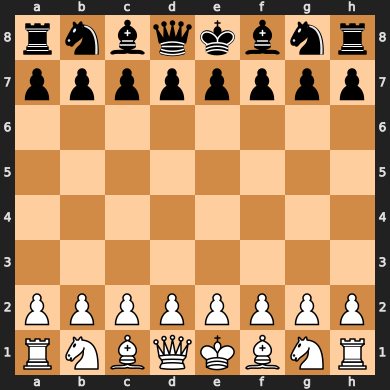

In [39]:
board

In [16]:
board = create_board('mate_in_two_or_promote')

In [17]:
board = Board(fen="8/3P2K1/p7/8/7R/6R1/1k6/8 w - - 0 1")

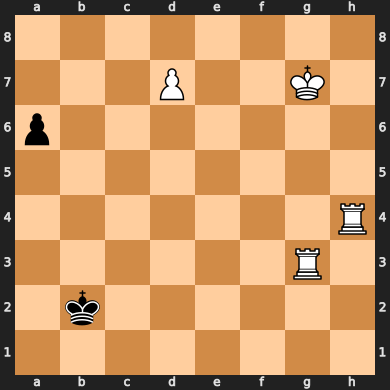

In [18]:
board

In [19]:
#board.push_uci('c4e6')

In [20]:
board_evaluation(board)

1050.0

In [21]:
prueba1 = minimax(board, depth=1)
prueba2 = minimax(board, depth=2)
prueba3 = minimax(board, depth=3)

In [22]:
depth = 2
legal_moves = board.legal_moves
tree = dict()
for move in legal_moves:# white playing
    tree[str(move)] = dict()
    child_node = board.copy()
    child_node.push_uci(str(move))
    for submove in child_node.legal_moves:# black playing
        subchild_node = child_node.copy()
        subchild_node.push_uci(str(submove))
        player = 2*int(subchild_node.turn) - 1
        value = player * board_evaluation(subchild_node)
        tree[str(move)][str(submove)] = value
    tree[str(move)] = min(list(tree[str(move)].values()))
best_move = max(tree, key=tree.get)

In [24]:
best_move

'd7d8q'

In [25]:
board = Board()

In [26]:
board.board_fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR'

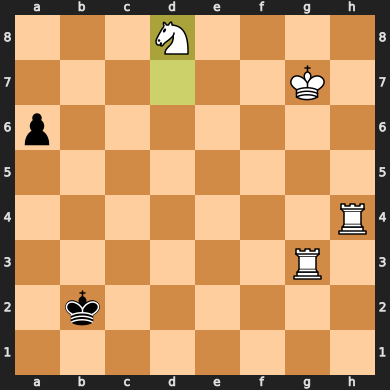

In [30]:
child_node

In [69]:
class Player(ABC):
    @abstractmethod
    def play(board: Board) -> str:
        pass

In [88]:
class MiniMaxPlayer(Player):
    def __init__(self, depth=2, add_mobility=False):
        self.depth = depth
        self.add_mobility = add_mobility

    def play(self, board: Board) -> str:
        best_move = minimax(board, self.depth, self.add_mobility)[1]
        return best_move

In [89]:
player = MiniMaxPlayer(depth=3, add_mobility=False)

In [90]:
player.play(board)

'g2g4'

In [81]:
minimax(board, 2, player.kwargs)

TypeError: minimax() takes from 1 to 2 positional arguments but 3 were given

In [84]:
minimax(board, depth=2, add_mobility=False)

(0.0, 'e2e3')

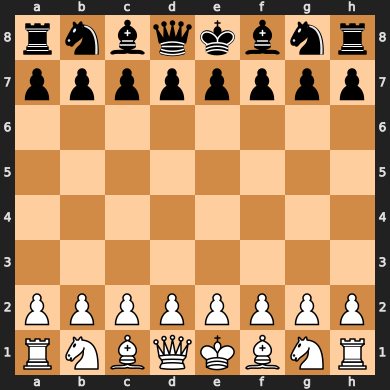

In [35]:
board